# Fitting the model to experimental data

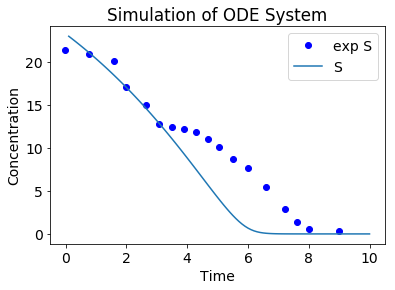

In [73]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

conc1 = np.array([21.36432792,20.88839388,20.14515649,17.09960044,14.96501482,12.77544711,12.40382841,12.1925616,11.87441864,11.02144302,10.06136529,8.727409327,7.661208627,5.472695365,2.856451546,1.361767109,0.615742955,0.355067579])
time1 = np.array([-0.01767712,0.782591012,1.594277343,1.979091741,2.645083057,3.085753236,3.491596401,3.886081622,4.29189466,4.686741407,5.059113282,5.499301426,5.99567675,6.594092814,7.204017459,7.599225732,7.994012224,8.996975985])

km = 2.9
ks = 1.6
Y = 0.06
FH2 = 0.37

def ode_model(SXP, time):
    S, X, P = SXP
    dSdt = -((km*S)/(ks+S))*X
    dXdt = Y*km*(S/(ks+S))*X
    dPdt = FH2*(1-Y)*km*(S/(ks+S))*X 
    return [dSdt, dXdt, dPdt]

# Initial conditions
S0 = 23
X0 = 1
P0 = 0.001

time = np.linspace(0.1, 10, 100)

# Solving the ODE system
initial_conditions = [S0, X0, P0]
solution = odeint(ode_model, initial_conditions, time)

plt.plot(time1,conc1,'ob',label='exp S')
plt.plot(time, solution[:, 0], label='S')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Simulation of ODE System')
plt.legend()
plt.show()


# Optimizing the model to experimental data

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Optimized Parameters:
km: 2.6495339167393928
ks: -3.3219589417509625
Y: -0.031011360998969662
FH2: -804882.8328740794


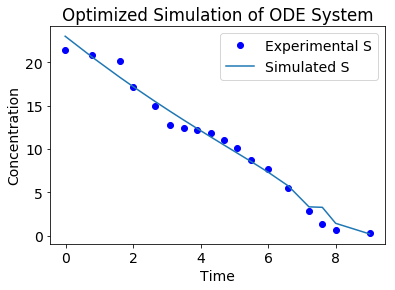

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Experimental data
conc1 = np.array([21.36432792, 20.88839388, 20.14515649, 17.09960044, 14.96501482, 12.77544711, 12.40382841, 12.1925616, 11.87441864, 11.02144302, 10.06136529, 8.727409327, 7.661208627, 5.472695365, 2.856451546, 1.361767109, 0.615742955, 0.355067579])
time1 = np.array([-0.01767712, 0.782591012, 1.594277343, 1.979091741, 2.645083057, 3.085753236, 3.491596401, 3.886081622, 4.29189466, 4.686741407, 5.059113282, 5.499301426, 5.99567675, 6.594092814, 7.204017459, 7.599225732, 7.994012224, 8.996975985])

# ODE model
def ode_model(time, km, ks, Y, FH2):
    def model(SXP, time):
        S, X, P = SXP
        dSdt = -((km * S) / (ks + S)) * X
        dXdt = Y * km * (S / (ks + S)) * X
        dPdt = FH2 * (1 - Y) * km * (S / (ks + S)) * X
        return [dSdt, dXdt, dPdt]

    S0 = 23
    X0 = 1
    P0 = 0.001

    initial_conditions = [S0, X0, P0]
    solution = odeint(model, initial_conditions, time)
    return solution[:, 0]  # Returning simulated S concentrations

# Define the function to fit the curve
def fit_function(time, km, ks, Y, FH2):
    return ode_model(time, km, ks, Y, FH2)

# Initial parameter guesses
initial_guess = [2.9, 1.6, 0.06, 0.37]

# Use curve_fit to optimize the parameters
optimized_params, _ = curve_fit(fit_function, time1, conc1, p0=initial_guess)

print("Optimized Parameters:")
print("km:", optimized_params[0])
print("ks:", optimized_params[1])
print("Y:", optimized_params[2])
print("FH2:", optimized_params[3])

# Plotting the optimized solution against experimental data
simulated_conc = ode_model(time1, *optimized_params)

plt.plot(time1, conc1, 'ob', label='Experimental S')
plt.plot(time1, simulated_conc, label='Simulated S')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Optimized Simulation of ODE System')
plt.legend()
plt.show()


# Fitting the model to experimental data

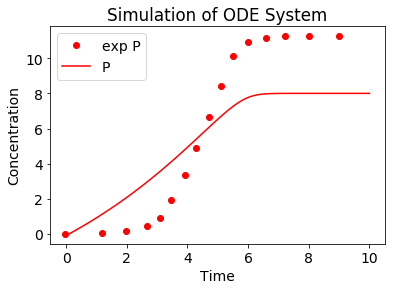

In [64]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

conc2 = np.array([0,0.059850374,0.149625935,0.448877805,0.927680798,1.945137157,3.381546135,4.907730673,6.673316708,8.438902743,10.1446384,10.92269327,11.16209476,11.25187032,11.25187032,11.25187032])
time2 = np.array([-0.032865975,1.184777628,1.98531293,2.662031505,3.090891711,3.475162151,3.904922024,4.289670412,4.708465589,5.104712851,5.500903885,5.997688979,6.606707583,7.204311656,8.004762614,9.008144801])

km = 2.9
ks = 1.6
Y = 0.06
FH2 = 0.37

def ode_model(SXP, time):
    S, X, P = SXP
    dSdt = -((km*S)/(ks+S))*X
    dXdt = Y*km*(S/(ks+S))*X
    dPdt = FH2*(1-Y)*km*(S/(ks+S))*X 
    return [dSdt, dXdt, dPdt]

# Initial conditions
S0 = 23
X0 = 1
P0 = 0.001

time = np.linspace(0.1, 10, 100)

# Solving the ODE system
initial_conditions = [S0, X0, P0]
solution = odeint(ode_model, initial_conditions, time)

plt.plot(time2,conc2,'or',label='exp P')
plt.plot(time, solution[:, 2],color ='red', label='P')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Simulation of ODE System')
plt.legend()
plt.show()


# Optimizing the model to experimental data

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


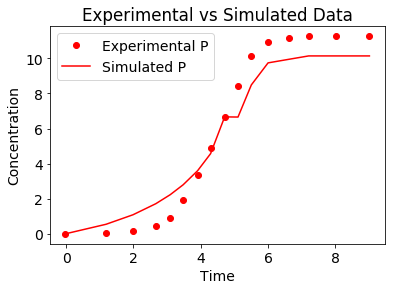

Optimized parameters:
km = 0.7689808882900583
ks = -4.636047895517503
Y = 0.39833370147465086
FH2 = 0.6028263365095026


In [65]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

conc2 = np.array([0, 0.059850374, 0.149625935, 0.448877805, 0.927680798, 1.945137157, 3.381546135, 4.907730673, 6.673316708, 8.438902743, 10.1446384, 10.92269327, 11.16209476, 11.25187032, 11.25187032, 11.25187032])
time2 = np.array([-0.032865975, 1.184777628, 1.98531293, 2.662031505, 3.090891711, 3.475162151, 3.904922024, 4.289670412, 4.708465589, 5.104712851, 5.500903885, 5.997688979, 6.606707583, 7.204311656, 8.004762614, 9.008144801])

# Experimental data
exp_data = conc2
exp_time = time2

# Define the ODE model function
def ode_model(time, km, ks, Y, FH2):
    def model(SXP, time):
        S, X, P = SXP
        dSdt = -((km * S) / (ks + S)) * X
        dXdt = Y * km * (S / (ks + S)) * X
        dPdt = FH2 * (1 - Y) * km * (S / (ks + S)) * X
        return [dSdt, dXdt, dPdt]

    # Initial conditions
    S0 = 23
    X0 = 1
    P0 = 0.001

    # Solve the ODE system
    initial_conditions = [S0, X0, P0]
    solution = odeint(model, initial_conditions, time)
    return solution[:, 2]  # Return P concentration

# Function to minimize (residuals)
def fit_odeint(time, km, ks, Y, FH2):
    return ode_model(time, km, ks, Y, FH2)

# Initial guess for parameters
initial_guess = [2.9, 1.6, 0.06, 0.37]

# Curve fitting using least squares optimization
params, params_covariance = curve_fit(fit_odeint, exp_time, exp_data, p0=initial_guess)

# Extract optimized parameters
km_opt, ks_opt, Y_opt, FH2_opt = params

# Generate simulated data using optimized parameters
simulated_data = ode_model(exp_time, km_opt, ks_opt, Y_opt, FH2_opt)

# Plotting experimental and simulated data
plt.plot(exp_time, exp_data, 'or', label='Experimental P')
plt.plot(exp_time, simulated_data, color='red', label='Simulated P')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Experimental vs Simulated Data')
plt.legend()
plt.show()

# Display optimized parameters
print("Optimized parameters:")
print(f"km = {km_opt}")
print(f"ks = {ks_opt}")
print(f"Y = {Y_opt}")
print(f"FH2 = {FH2_opt}")


# Bifurcation for Parameter ks

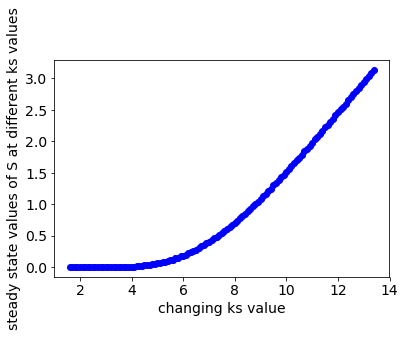

In [66]:
# Bifurcation for Parameter ks

km = 2.9
ks = 16
Y = 0.06
FH2 = 0.37

steady_S = []
ks_Val = []
for i in range(ks,135,1):
    def model(u, time):
        S, X, P = u[0], u[1], u[2]
        dSdt = -((km * S) / (i/10 + S)) * X
        dXdt = Y * km * (S / (i/10 + S)) * X
        dPdt = FH2 * (1 - Y) * km * (S / (i/10 + S)) * X
        return [dSdt, dXdt, dPdt]
        
    time = np.linspace(0.1, 10, 100)
    u0 = [23, 1, 0.001]
    sol = odeint(model, u0, time)
    S, X, P = sol[:,0], sol[:,1], sol[:,2]
    final_S = S[-1]
    steady_S.append(float("{:.2f}".format(final_S)))
    ks_Val.append(float("{:.3f}".format(i/10)))
plt.plot(ks_Val,steady_S,'ob')
plt.xlabel('changing ks value') 
plt.ylabel('steady state values of S at different ks values')
plt. savefig ('bifurication_1.png')

# Bifurcation for Parameter Y

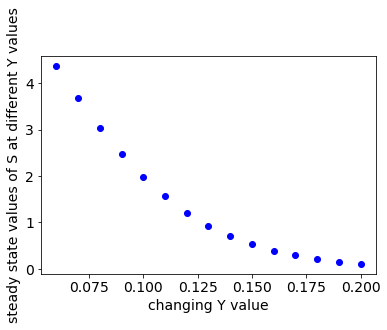

In [67]:
# Bifurcation for Parameter Y

km = 2.9
ks = 16
Y = 6
FH2 = 0.37

steady_S = []
Y_Val = []
for i in range(Y,21,1):
    def model(u, time):
        S, X, P = u[0], u[1], u[2]
        dSdt = -((km * S) / (ks + S)) * X
        dXdt = (i/100) * km * (S / (ks + S)) * X
        dPdt = FH2 * (1 - (i/100)) * km * (S / (ks + S)) * X
        return [dSdt, dXdt, dPdt]
        
    time = np.linspace(0.1, 10, 100)
    u0 = [23, 1, 0.001]
    sol = odeint(model, u0, time)
    S, X, P = sol[:,0], sol[:,1], sol[:,2]
    final_S = S[-1]
    steady_S.append(float("{:.2f}".format(final_S)))
    Y_Val.append(float("{:.3f}".format(i/100)))
plt.plot(Y_Val,steady_S,'ob')
plt.xlabel('changing Y value') 
plt.ylabel('steady state values of S at different Y values')
plt. savefig ('bifurication_2.png')

# Sensitivity analysis

2.3799999980001436


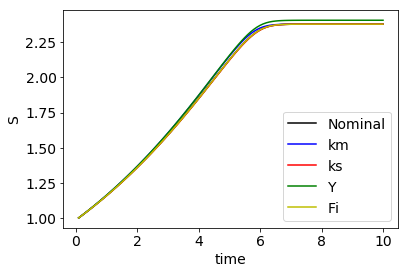

In [68]:
# Sensitivity

#@title
# Import the required modules
import numpy as np
import math
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

# Define a function which calculates the derivative
def func(SXP,time,km,ks,Y,FH2):
    S,X,P = SXP;
    dSdt = -((km*S)/(ks+S))*X
    dXdt = Y*km*(S/(ks+S))*X
    dPdt = FH2*(1-Y)*km*(S/(ks+S))*X 
    return [dSdt, dXdt, dPdt]

timesteps = np.linspace(0.1,10,100)
y0 = [23,1,0.001];

y = odeint(func, y0, timesteps, args = (2.9,1.6,0.06,0.37))
y1 = odeint(func, y0, timesteps, args = (2.9*1.02,1.6,0.06,0.37))
y2 = odeint(func, y0, timesteps, args = (2.9,1.6*1.02,0.06,0.37))
y3 = odeint(func, y0, timesteps, args = (2.9,1.6,0.06*1.02,0.37))
y4 = odeint(func, y0, timesteps, args = (2.9,1.6,0.06,0.37*1.02))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, y[:,1],'k', label = "Nominal");
plt.plot(timesteps, y1[:,1],'b', label = "km");
plt.plot(timesteps, y2[:,1],'r', label = "ks");
plt.plot(timesteps, y3[:,1],'g', label = "Y");
plt.plot(timesteps, y4[:,1],'y', label = "Fi");
plt.legend()

# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,1])

# Local sensitivity analysis

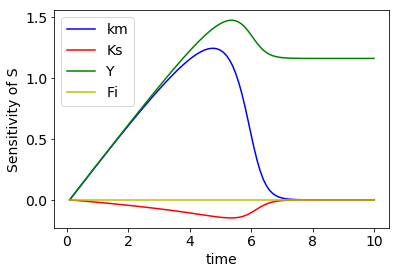

In [69]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of S")
plt.plot(timesteps, ((y1[:,1] - y[:,1])/y[:,1])/0.01,'b', label = "km");
plt.plot(timesteps, ((y2[:,1] - y[:,1])/y[:,1])/0.01,'r', label = "Ks");
plt.plot(timesteps,((y3[:,1] - y[:,1])/y[:,1])/0.01,'g', label = "Y");
plt.plot(timesteps,((y4[:,1] - y[:,1])/y[:,1])/0.01,'y', label = "Fi");
plt.legend()

# Global Sensitivity Analysis Step 1: generate data

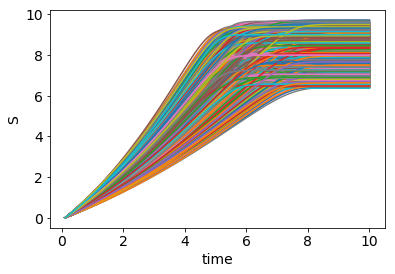

In [70]:
# generate several output for random selections of parameters
N = 1000;
km = np.random.uniform(2.8*.8,2.8*1.2,N);
ks = np.random.uniform(1.6*.8,1.6*1.2,N);
Y = np.random.uniform(0.06*.8,0.06*1.2,N);
Fi = np.random.uniform(0.37*.8,0.37*1.2,N);

S = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(func, y0, timesteps, args = (km[m],ks[m],Y[m],Fi[m]));
    plt.plot(timesteps,output[:,2]);
    plt.xlabel("time");
    plt.ylabel("S");
    S[m]=output[-1,2];

# Global Sensitivity Analysis Step 2: visualize your parameter space

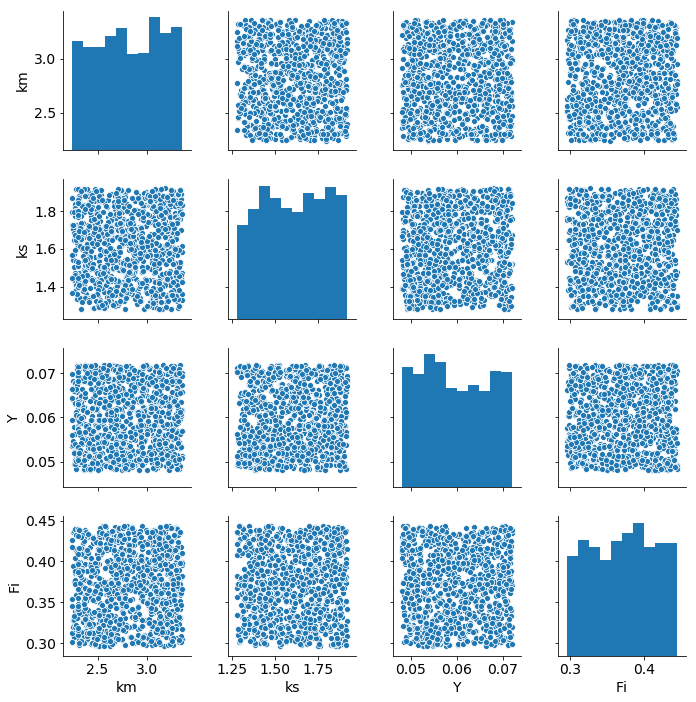

In [71]:
# Plot histograms of sampled parameter space
import pandas as pd
import seaborn as sns

tmp = {'km':km, 'ks':ks, 'Y':Y, 'Fi':Fi};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)
20
plt.show()

# Global Sensitivity Analysis Step 3: Use least squares to estimate the normalized sensitivities

Our fitted equn is y =  -5.141793532239516 km +  0.13145134266188796 ks + -0.923040625344288 Y + 4.2282296112710265 Fi


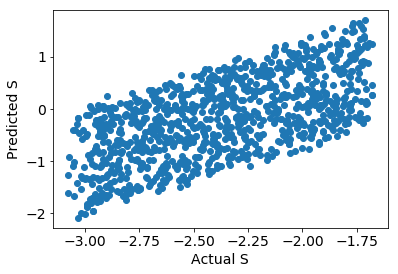

In [72]:
# Now we have our output of interest, called P. Using our old least squares code, let y = P and normalize the values by
# the value of P's steadystate for the nominal parameter values. This was calculated in step 1 above.

# Normalize y
y = (2.38-S)/2.38; # See first set of code to find this number


# Build our X. Normalize values
X = np.c_[(2.9-km)/2.9,(1.6-Ks)/1.6,(0.06-Y)/0.06,(0.37-Fi)/0.37]

# Now can just do the linear least squares estimate
#===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "km + ", params[1], "ks +", params[2],"Y +", params[3],"Fi")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted S");
plt.xlabel("Actual S");

# # For completeness - let's throw in doing the same thing but with a Linear Regression package. I will show this in class
# # just so we're aware of these packages

# from sklearn.linear_model import LinearRegression
# model = LinearRegression(fit_intercept = False);
# fitted = model.fit(X,y);
# print(fitted.coef_)
# print(fitted.score(X,y)) # R squared

# # Use a different toolbox. R is way better at this...

# import statsmodels.api as sm
# model = sm.OLS(y, X).fit()
# print(model.summary())

# # With interactions
# X = np.c_[(50-Vmax)/50,(1-Km),(1-Degradation),(50-Vmax)/50*(1-Km)]
# model = sm.OLS(y, X).fit()
# print(model.summary())